In [34]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [35]:
#importing data
data = pd.read_csv("financial_data.csv")
print(data.shape)
data.head()

(17908, 21)


entry_id  age  pay_schedule  home_owner  income  months_employed  \
0   7629673   40     bi-weekly           1    3135                0   
1   3560428   61        weekly           0    3180                0   
2   6934997   23        weekly           0    1540                6   
3   5682812   40     bi-weekly           0    5230                0   
4   5335819   33  semi-monthly           0    3590                0   

   years_employed  current_address_year  personal_account_m  \
0               3                     3                   6   
1               6                     3                   2   
2               0                     0                   7   
3               6                     1                   2   
4               5                     2                   2   

   personal_account_y  has_debt  amount_requested  risk_score  risk_score_2  \
0                   2         1               550       36200      0.737398   
1                   7         1               600       30150      0.738510   
2                   1         1               450       34550      0.642993   
3                   7         1               700       42150      0.665224   
4                   8         1              1100       53850      0.617361   

   risk_score_3  risk_score_4  risk_score_5  ext_quality_score  \
0      0.903517      0.487712      0.515977           0.580918   
1      0.881027      0.713423      0.826402           0.730720   
2      0.766554      0.595018      0.762284           0.531712   
3      0.960832      0.767828      0.778831           0.792552   
4      0.857560      0.613487      0.665523           0.744634   

   ext_quality_score_2  inquiries_last_month  e_signed  
0             0.380918                    10         1  
1             0.630720                     9         0  
2             0.531712                     7         0  
3             0.592552                     8         1  
4             0.744634                    12         0

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 20 columns):
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month    17908 non-null int64
e_signed               

In [36]:
data = data.drop('entry_id', axis =1)

C:\Users\B\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\B\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


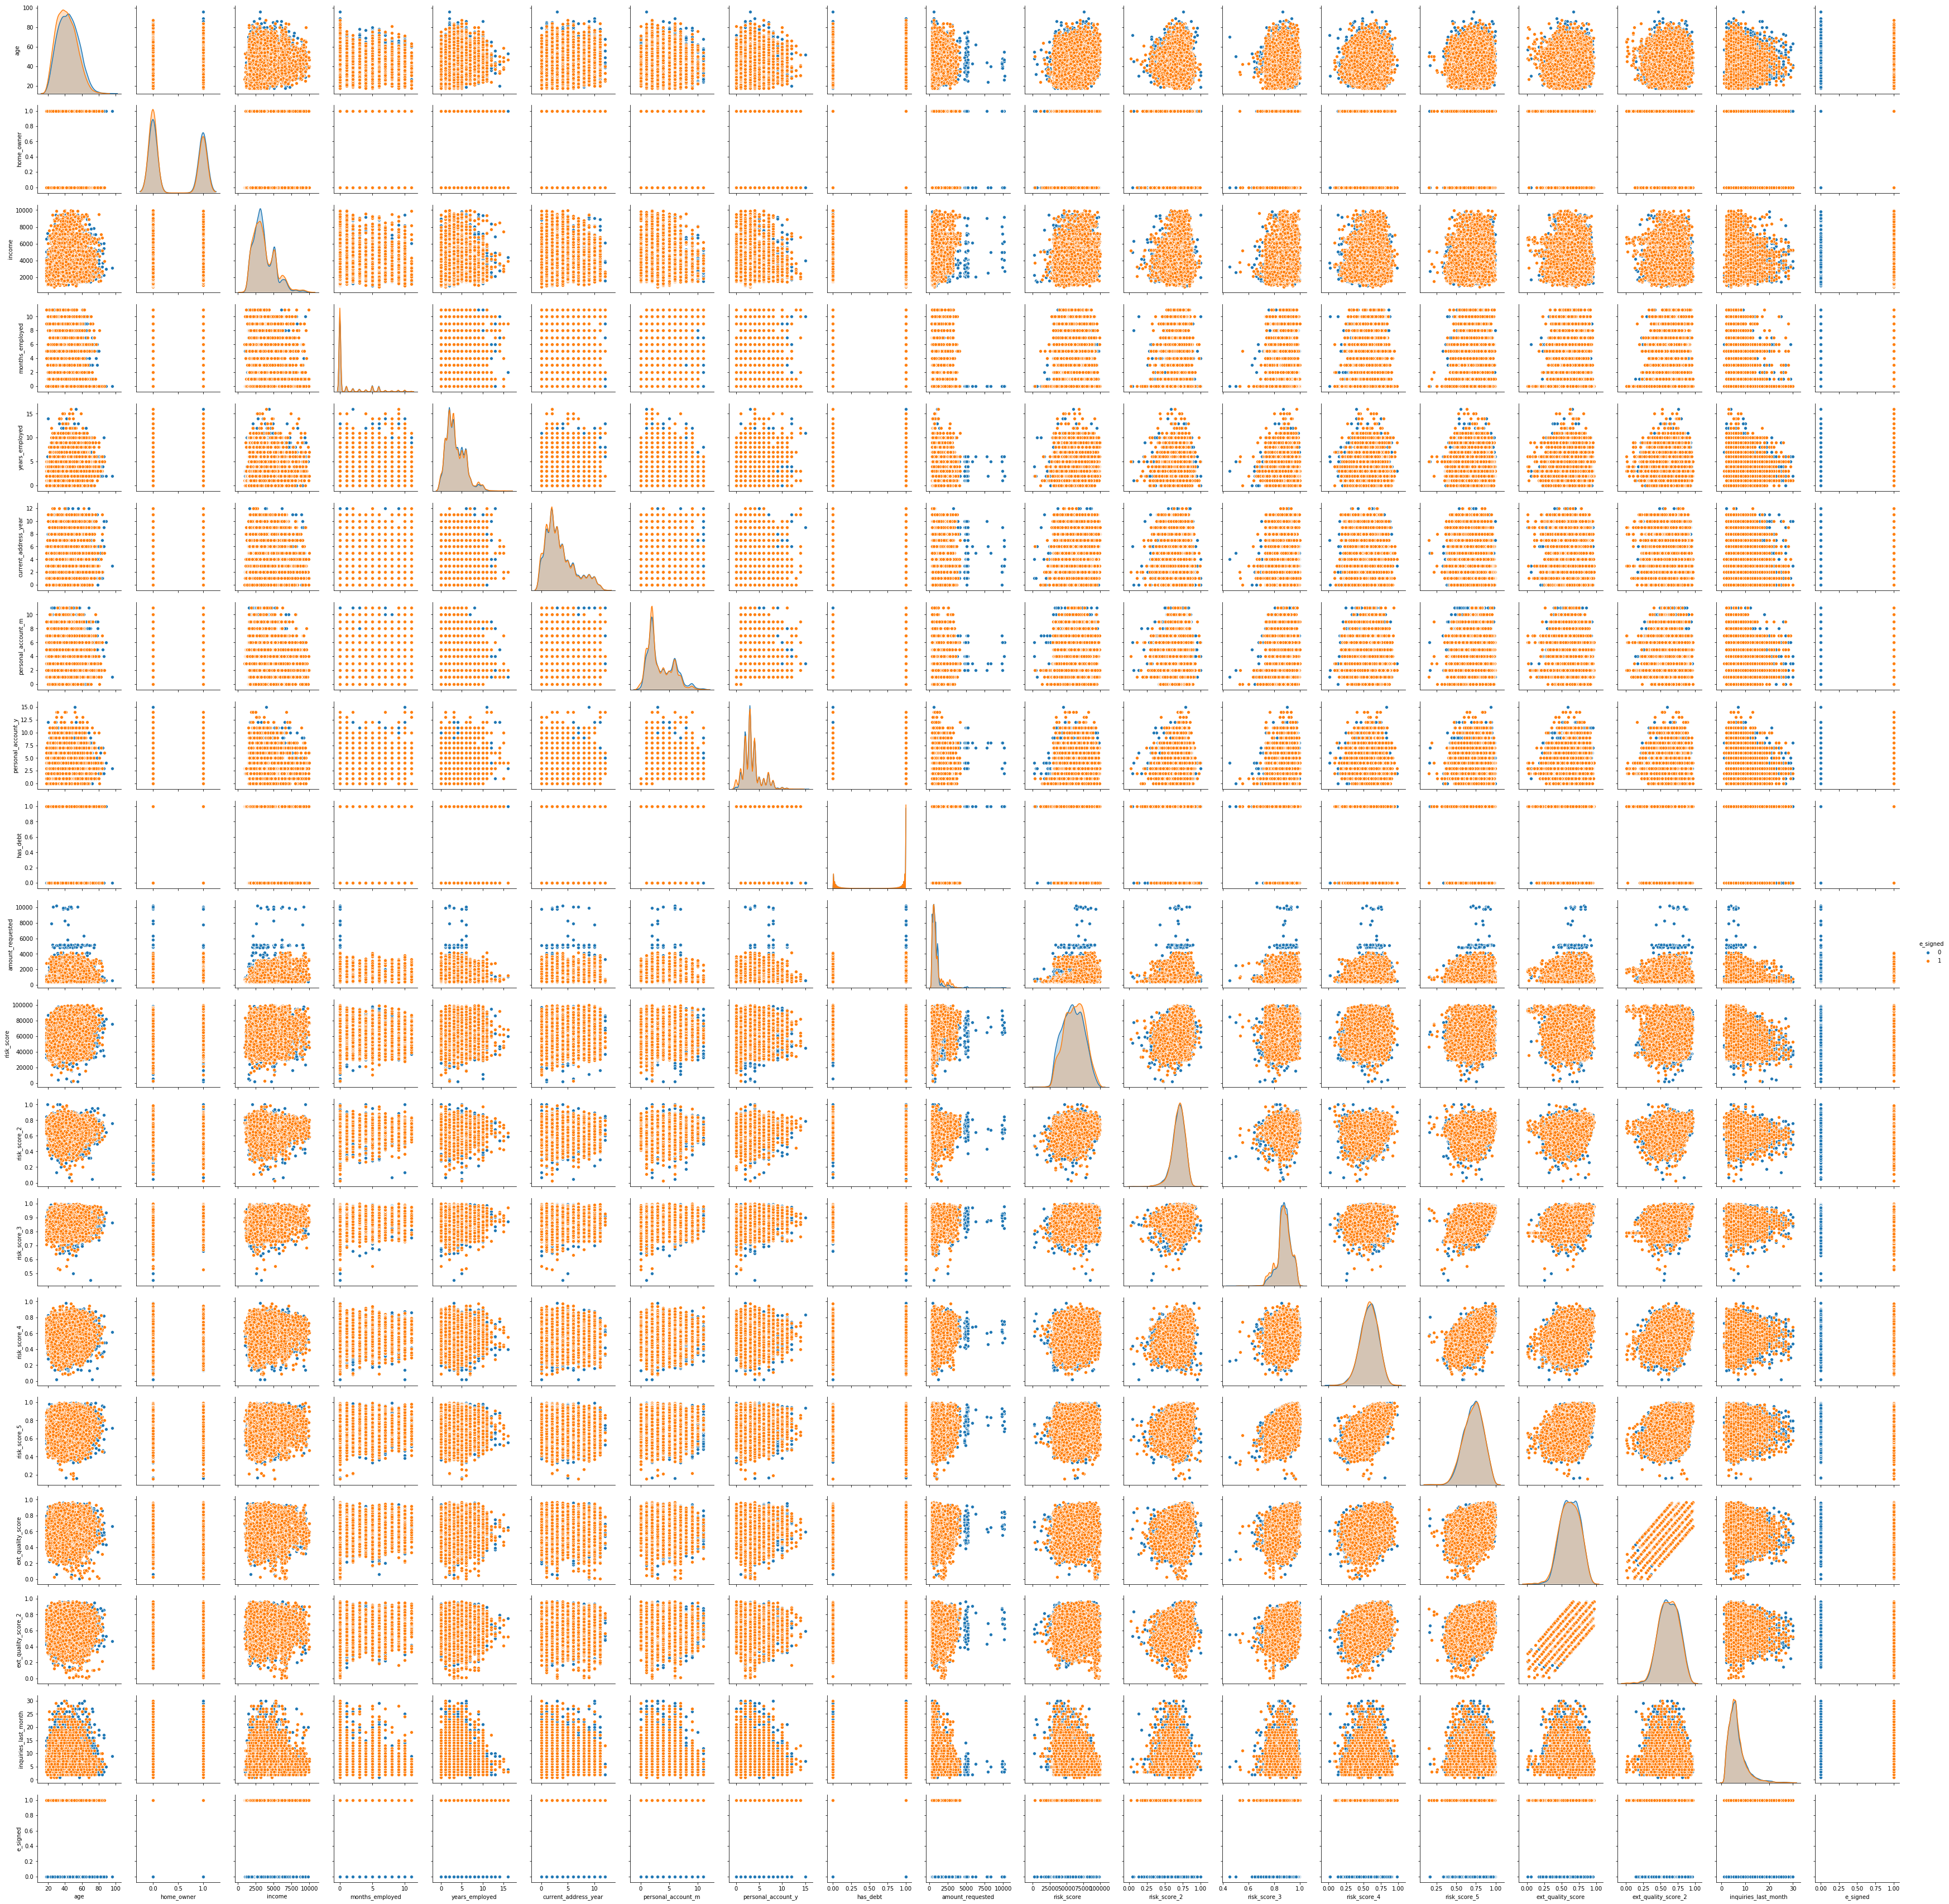

In [69]:
sns.pairplot(data, hue='e_signed')

In [37]:
#checking for imbalanced data
data.e_signed.value_counts()

1    9639
0    8269
Name: e_signed, dtype: int64

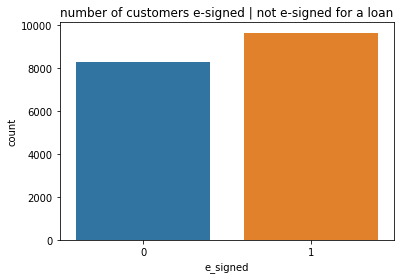

In [71]:
plt.title('number of customers e-signed | not e-signed for a loan', fontsize =12)
sns.countplot('e_signed', data =data)

In [40]:
numerical =[col for col in data.columns if data[col].dtype !='O']

In [62]:
discrete =[]
for col in numerical:
    if len(data[col].unique()) < 20:
        discrete.append(col)

In [63]:
discrete

['home_owner',
 'months_employed',
 'years_employed',
 'current_address_year',
 'personal_account_m',
 'personal_account_y',
 'has_debt',
 'e_signed']

In [64]:
continous =[col for col in numerical if col not in discrete and col not in 'e_signed']

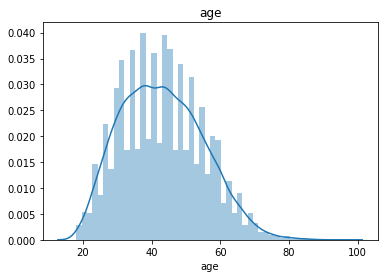

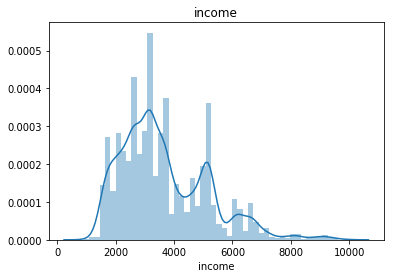

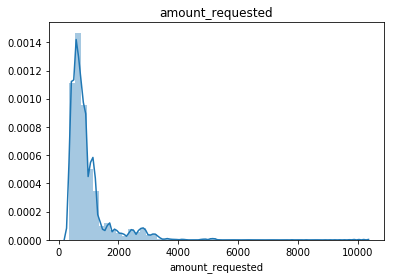

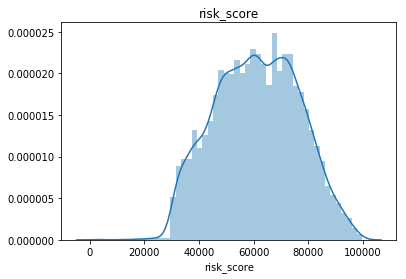

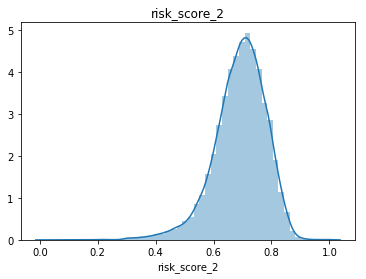

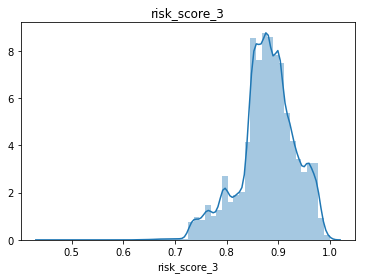

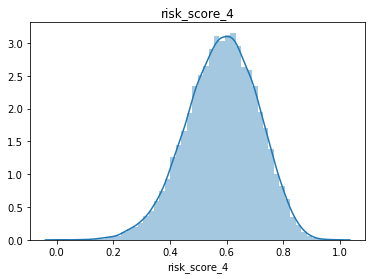

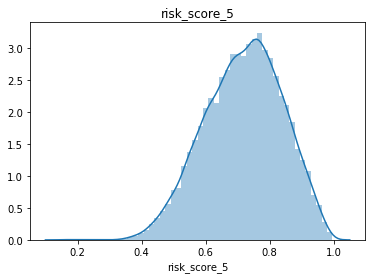

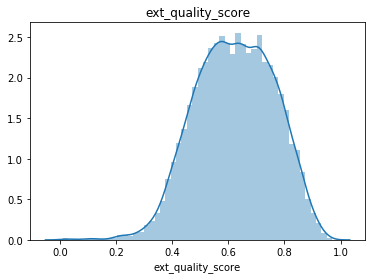

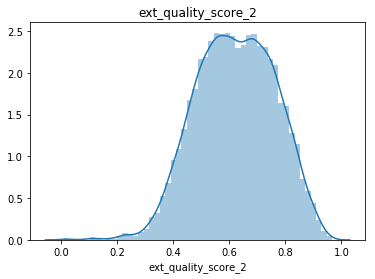

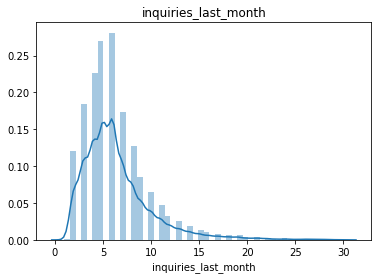

In [66]:
##distribution of data
for col in continous:
    sns.distplot(data[col])
    plt.title(col)
    plt.show()

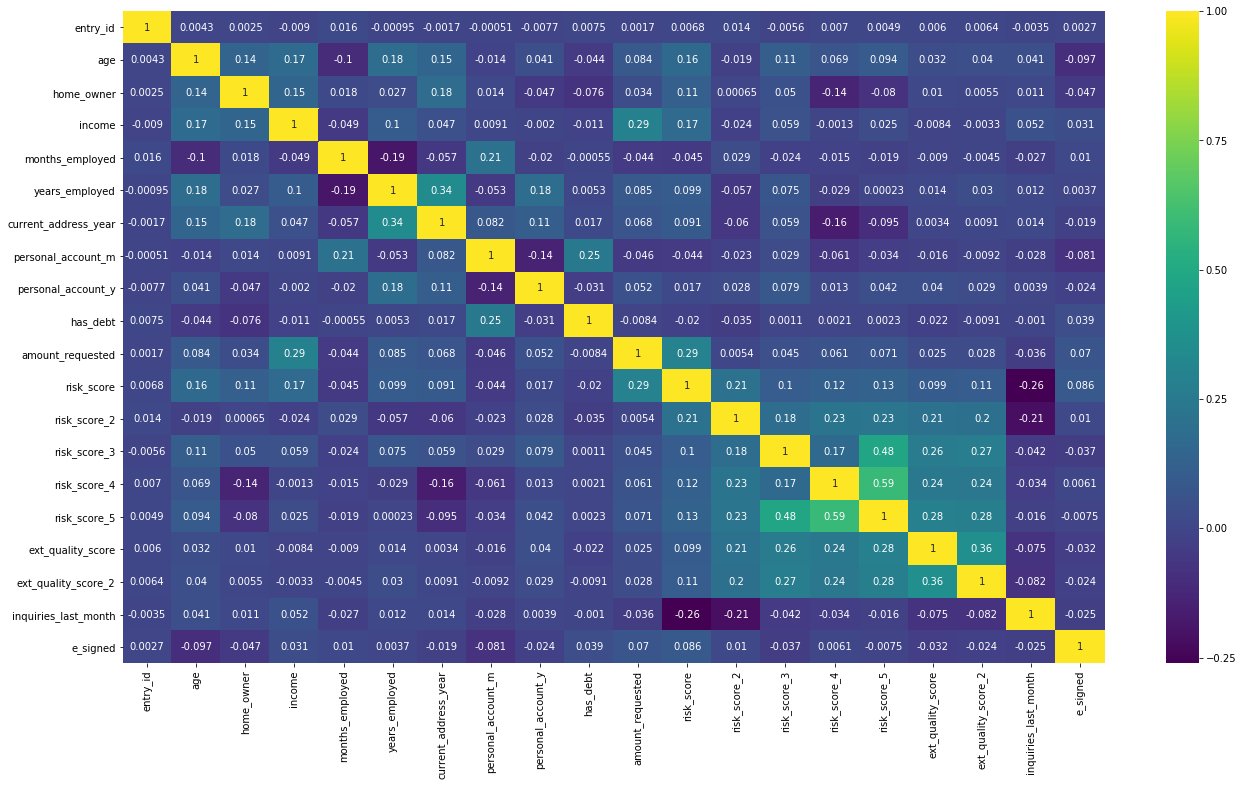

In [4]:
#ploting the corolation matrix to detect the multicolinearity

plt.figure(figsize=(22,12))
sns.heatmap(data.corr(), annot =True, cmap='viridis')

In [68]:
data.describe()

age    home_owner        income  months_employed  \
count  17908.000000  17908.000000  17908.000000     17908.000000   
mean      43.015412      0.425173   3657.214653         1.186006   
std       11.873107      0.494383   1504.890063         2.400897   
min       18.000000      0.000000    905.000000         0.000000   
25%       34.000000      0.000000   2580.000000         0.000000   
50%       42.000000      0.000000   3260.000000         0.000000   
75%       51.000000      1.000000   4670.000000         1.000000   
max       96.000000      1.000000   9985.000000        11.000000   

       years_employed  current_address_year  personal_account_m  \
count    17908.000000          17908.000000        17908.000000   
mean         3.526860              3.584711            3.427183   
std          2.259732              2.751937            2.216440   
min          0.000000              0.000000            0.000000   
25%          2.000000              2.000000            2.000000   
50%          3.000000              3.000000            2.000000   
75%          5.000000              5.000000            5.000000   
max         16.000000             12.000000           11.000000   

       personal_account_y      has_debt  amount_requested    risk_score  \
count        17908.000000  17908.000000      17908.000000  17908.000000   
mean             3.503350      0.795399        950.446449  61086.302211   
std              1.955568      0.403421        698.543683  15394.255020   
min              0.000000      0.000000        350.000000   2100.000000   
25%              2.000000      1.000000        600.000000  49350.000000   
50%              3.000000      1.000000        700.000000  61200.000000   
75%              4.000000      1.000000       1100.000000  72750.000000   
max             15.000000      1.000000      10200.000000  99750.000000   

       risk_score_2  risk_score_3  risk_score_4  risk_score_5  \
count  17908.000000  17908.000000  17908.000000  17908.000000   
mean       0.690878      0.878276      0.583155      0.718252   
std        0.090470      0.054563      0.125061      0.120697   
min        0.023258      0.451371      0.016724      0.153367   
25%        0.640993      0.850882      0.500208      0.633708   
50%        0.699561      0.881004      0.588208      0.725113   
75%        0.752887      0.912608      0.672395      0.806681   
max        0.999997      0.999024      0.978932      0.996260   

       ext_quality_score  ext_quality_score_2  inquiries_last_month  \
count       17908.000000         17908.000000          17908.000000   
mean            0.623112             0.622068              6.457226   
std             0.139729             0.139898              3.673093   
min             0.010184             0.006622              1.000000   
25%             0.521735             0.519677              4.000000   
50%             0.625944             0.622974              6.000000   
75%             0.729841             0.728940              8.000000   
max             0.970249             0.966953             30.000000   

           e_signed  
count  17908.000000  
mean       0.538251  
std        0.498549  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [5]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('entry_id', axis =1), data.e_signed, test_size =0.2, random_state =0)

In [6]:
#find categorical features
cat_var = [col for col in X_train.columns if X_train[col].dtype =='O']
cat_var

['pay_schedule']

In [7]:
#checking for null values in train and test sets
[col for col in X_train.columns if X_train[col].isnull().sum() > 0]

[]

In [8]:
[col for col in X_test.columns if X_test[col].isnull().sum() > 0]

[]

In [9]:

def categorical_encode(var , target):
    order = X_train.groupby(var)[target].mean().to_dict()
    X_train[var] = X_train[var].map(order)
    X_test[var] = X_test[var].map(order)

In [10]:
categorical_encode('pay_schedule', 'e_signed')

In [11]:
X_train = X_train.drop('e_signed', axis =1)
X_test= X_test.drop('e_signed', axis =1)

In [12]:
X_train.describe()

age  pay_schedule    home_owner        income  \
count  14326.000000  14326.000000  14326.000000  14326.000000   
mean      43.071339      0.538252      0.423077   3658.985551   
std       11.907565      0.018315      0.494065   1501.900351   
min       18.000000      0.527749      0.000000    905.000000   
25%       34.000000      0.527749      0.000000   2580.000000   
50%       42.000000      0.527749      0.000000   3265.000000   
75%       51.000000      0.539911      1.000000   4675.000000   
max       96.000000      0.586849      1.000000   9985.000000   

       months_employed  years_employed  current_address_year  \
count     14326.000000    14326.000000          14326.000000   
mean          1.184001        3.534343              3.573922   
std           2.396026        2.254437              2.744237   
min           0.000000        0.000000              0.000000   
25%           0.000000        2.000000              2.000000   
50%           0.000000        3.000000              3.000000   
75%           1.000000        5.000000              5.000000   
max          11.000000       16.000000             12.000000   

       personal_account_m  personal_account_y      has_debt  amount_requested  \
count        14326.000000        14326.000000  14326.000000      14326.000000   
mean             3.421751            3.505165      0.795477        949.228187   
std              2.217962            1.941035      0.403367        699.125123   
min              0.000000            0.000000      0.000000        350.000000   
25%              2.000000            2.000000      1.000000        600.000000   
50%              2.000000            3.000000      1.000000        700.000000   
75%              5.000000            4.000000      1.000000       1100.000000   
max             11.000000           15.000000      1.000000      10200.000000   

         risk_score  risk_score_2  risk_score_3  risk_score_4  risk_score_5  \
count  14326.000000  14326.000000  14326.000000  14326.000000  14326.000000   
mean   61036.095212      0.691829      0.878129      0.583080      0.717571   
std    15398.751599      0.090317      0.054626      0.126021      0.120971   
min     2100.000000      0.023258      0.451371      0.016724      0.153367   
25%    49350.000000      0.642247      0.850848      0.499848      0.632740   
50%    61200.000000      0.700006      0.880993      0.588465      0.724552   
75%    72650.000000      0.753616      0.912619      0.672962      0.806133   
max    99750.000000      0.999997      0.999024      0.978932      0.993363   

       ext_quality_score  ext_quality_score_2  inquiries_last_month  
count       14326.000000         14326.000000          14326.000000  
mean            0.623028             0.622798              6.438992  
std             0.139633             0.139768              3.676805  
min             0.010184             0.006622              1.000000  
25%             0.521980             0.520969              4.000000  
50%             0.625687             0.624402              6.000000  
75%             0.729171             0.729323              8.000000  
max             0.966953             0.966953             30.000000

In [13]:
#standarization of train and test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scalled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
import xgboost as xgb
xgb_model  = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

pred = xgb_model.predict_proba(X_train)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = xgb_model.predict_proba(X_test)
xgb_pred=roc_auc_score(y_test, pred[:,1])
print('xgb test roc-auc: {}'.format(xgb_pred))

xgb train roc-auc: 0.7341793334864457
xgb test roc-auc: 0.6933742605628503


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test)
rf_pred=roc_auc_score(y_test, pred[:,1])
print('RF test roc-auc: {}'.format(rf_pred))
#clear sign of overcfitting

RF train roc-auc: 1.0
RF test roc-auc: 0.6980968744198649


In [17]:
##takes time
from sklearn.model_selection import GridSearchCV
params={ 'max_depth':[6,10],
        'criterion':['gini', 'entropy'],
        'max_leaf_nodes':[5,8,10]
}
gridsearch = GridSearchCV(rf_model, params, scoring ='accuracy', cv =10)
gridsearch = gridsearch.fit(X_train, y_train)

In [18]:
gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10}

In [19]:
rf_model = RandomForestClassifier(n_estimators=200, criterion = 'gini', max_depth = 10, max_leaf_nodes = 10)
rf_model.fit(X_train, y_train)

pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test)
rf_pred=roc_auc_score(y_test, pred[:,1])
print('RF test roc-auc: {}'.format(rf_pred))

RF train roc-auc: 0.6731723672624427
RF test roc-auc: 0.6579463465909375


In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

pred = ada_model.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test)
ada_pred =roc_auc_score(y_test, pred[:,1])
print('Adaboost test roc-auc: {}'.format(ada_pred))

Adaboost train roc-auc: 0.6765294212614368
Adaboost test roc-auc: 0.6517389002895031


In [21]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train_scalled, y_train)
pred = svc.predict_proba(X_train_scalled)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = svc.predict_proba(X_test_scaled)
svc_pred =roc_auc_score(y_test, pred[:,1])
print('RF test roc-auc: {}'.format(svc_pred))

RF train roc-auc: 0.7704559055282512
RF test roc-auc: 0.6515780303752502


In [22]:
models = pd.DataFrame({'Models':['xgboost','random forest','adaboost', 'svc'],
                     'score' :[xgb_pred,rf_pred,ada_pred, svc_pred]})
models

Models     score
0        xgboost  0.693374
1  random forest  0.657946
2       adaboost  0.651739
3            svc  0.651578

In [23]:
models.sort_values(by ='score', ascending =False)


Models     score
0        xgboost  0.693374
1  random forest  0.657946
2       adaboost  0.651739
3            svc  0.651578

In [24]:
from sklearn.ensemble import VotingClassifier

estimators = [('xgb' ,xgb_model) , ('rf', rf_model),('ada', ada_model ),('svc', svc)]
voting_cl = VotingClassifier(estimators, voting='soft')
              

In [25]:
ensemble = voting_cl.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
ensemble_prediction = ensemble.predict_proba(X_test)[:, 1]

In [27]:
ensemble_prediction

array([0.51127815, 0.54538821, 0.52846455, ..., 0.52998198, 0.52964481,
       0.55602914])

In [28]:
roc_auc_score(y_test, ensemble_prediction)

0.6877690572834874